In [8]:
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from __future__ import print_function
% matplotlib inline
%pylab inline 

%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

Populating the interactive namespace from numpy and matplotlib


# The first half of this notebook is the essential part of it. It's cross validating my actual model with non-normalized data.

# The 2nd part repeats the same exercises but with a normalized dataset.

In [9]:
nons_df = pd.read_csv('DATAWNEWVARS.csv')
nons_df = nons_df.dropna()

In [11]:
# We're training on approximately 70% of my dataset, up until 2006
df_train2 = nons_df[nons_df['Year'] < 2006]
df_train2 = df_train2.dropna()
X_train2 = df_train2[['SMLY', 'LSTYRTOTAL', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y_train2 = df_train2[['VISITORS']]

In [12]:
# Creating the test set
df_test2 = nons_df[nons_df['Year'] >= 2006]
df_test2 = df_test2.dropna()
X_test2 = df_test2[['SMLY', 'LSTYRTOTAL', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y_test2 = df_test2[['VISITORS']]

In [13]:
lr = LinearRegression()
lr.fit(X_train2, y_train2)
y_pred2 = lr.predict(X_test2)
lr.score(X_test2, y_test2)

0.959379019783861

In [22]:
# Additional stats that are helpful
# np.mean(abs(y_pred2 - y_test2)/y_test2)
# np.median(abs(y_pred2 - y_test2)/y_test2)
# np.mean(abs(y_test2 - y_pred2))
# np.median(abs(y_test2 - y_pred2))
# np.mean(y_train2)

In [18]:
y_mean2 = [np.mean(y_train2)] * 17270

In [19]:
train_error = mean_squared_error(y_train2, lr.predict(X_train2))
test_error = mean_squared_error(y_test2, y_pred2)
mean_error = mean_squared_error(y_train2, y_mean2)
print(train_error)
print(test_error)
print(mean_error)

513532607.12683654
373874271.64138234
9687755710.36165


# Graphing the residuals

In [84]:
# Graphing a 45 degree line
x = [0, 1, 350000]
y = [0, 1, 350000]
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]


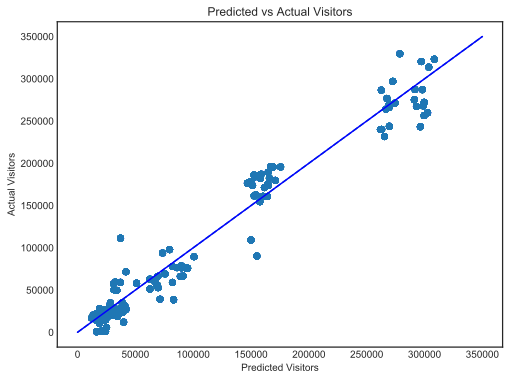

In [86]:
plt.figure(figsize=[8,6])
plt.scatter(y_pred2,y_test2)
plt.xlabel('Predicted Visitors')
plt.ylabel('Actual Visitors')
plt.title('Predicted vs Actual Visitors')
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'b')

# Same stuff but with normalized data

In [8]:
np_df = pd.read_csv('NORMALIZED_DATA.csv')

In [10]:
np_df = np_df[np_df.CHTYR < 7.5]

In [11]:
np_df = np_df[np_df.CHTYR > -7.5]

In [12]:
np_df = np_df[np_df.LSTYRTOTAL > -6.5]

In [165]:
df_dummies = pd.get_dummies(np_df.MONTH)

In [6]:
np_df = pd.concat([np_df, pd.get_dummies(np_df.MONTH)], axis=1, sort=False)

In [13]:
np_df = np_df.dropna()

In [14]:
lr = LinearRegression()
X = np_df[['SMLY', 'LSTYRTOTAL', 'CHTYR', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = np_df[['VISITORS']]
est = lr.fit(X, y)

In [25]:
df_train = np_df[np_df['Year'] < 2006]
df_train = df_train.dropna()
X_train = df_train[['SMLY', 'LSTYRTOTAL', 'CHTYR', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y_train = df_train[['VISITORS']]

In [26]:
df_test = np_df[np_df['Year'] >= 2006]
df_test = df_test.dropna()
X_test = df_test[['SMLY', 'LSTYRTOTAL', 'CHTYR', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y_test = df_test[['VISITORS']]

In [27]:
lr = LinearRegression()
StandardScaler(X_train)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lr.score(X_test, y_test)

0.959380705350777

In [33]:
y_pred = lr.predict(X_test)
y_pred_df = pd.DataFrame(data=y_pred[0:,0:])
np.mean(abs(y_pred - y_test)/y_test)

In [36]:
np.mean(abs(y_test - y_test.mean())/y_test)

VISITORS   -0.200202
dtype: float64

In [37]:
x = [-2, 0, 1, 3]
y = [-2, 0, 1, 3]

slope, intercept = np.polyfit(x, y, 1)

abline_values = [slope * i + intercept for i in x]

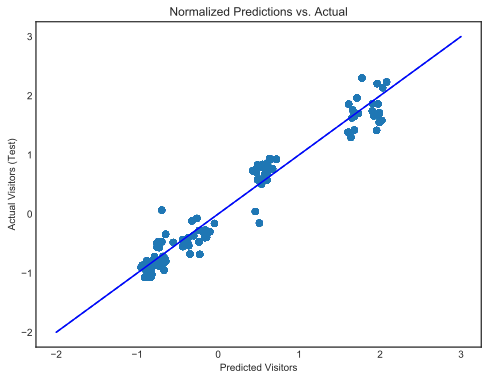

In [40]:
plt.figure(figsize=[8,6])
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted Visitors')
plt.ylabel('Actual Visitors (Test)')
plt.title('Normalized Predictions vs. Actual')
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'b')